In [12]:
import polars as pl

yellow = pl.read_parquet("yellow_tripdata_2025-01.parquet")
green = pl.read_parquet("green_tripdata_2025-01.parquet")

### **Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis**

In [22]:
TotalYellow = yellow.select(pl.col("total_amount").mean())
TotalGreen = green.select(pl.col("total_amount").mean())

print("Promedio Yellow:", TotalYellow)
print("Promedio Green:", TotalGreen)

print("Promedio Total:", (TotalYellow + TotalGreen)/2)

Promedio Yellow: shape: (1, 1)
┌──────────────┐
│ total_amount │
│ ---          │
│ f64          │
╞══════════════╡
│ 25.611292    │
└──────────────┘
Promedio Green: shape: (1, 1)
┌──────────────┐
│ total_amount │
│ ---          │
│ f64          │
╞══════════════╡
│ 22.634242    │
└──────────────┘
Promedio Total: shape: (1, 1)
┌──────────────┐
│ total_amount │
│ ---          │
│ f64          │
╞══════════════╡
│ 24.122767    │
└──────────────┘


### **Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero**

In [31]:
DistanciaYellow = yellow.select(pl.col("trip_distance").sum())
DistanciaGreen = green.select(pl.col("trip_distance").sum())

print("Yellow recorrió:", DistanciaYellow)
print("Green recorrió:", DistanciaGreen)

if DistanciaYellow[0,0] > DistanciaGreen[0,0]:
    print("Yellow recorrió más distancia")
else:
    print("Green recorrió más distancia")


Yellow recorrió: shape: (1, 1)
┌───────────────┐
│ trip_distance │
│ ---           │
│ f64           │
╞═══════════════╡
│ 2.0348e7      │
└───────────────┘
Green recorrió: shape: (1, 1)
┌───────────────┐
│ trip_distance │
│ ---           │
│ f64           │
╞═══════════════╡
│ 1.0406e6      │
└───────────────┘
Yellow recorrió más distancia


### **Qué tipo de taxi recibe más propinas en promedio**

In [32]:
PropinaYellow = yellow.select(pl.col("tip_amount").mean())
PropinaGreen = green.select(pl.col("tip_amount").mean())

print("Promedio propinas Yellow:", PropinaYellow)
print("Promedio propinas Green:", PropinaGreen)

if PropinaYellow[0, 0] > PropinaGreen[0, 0]:
    print("Yellow recibe más propinas")
else:
    print("Green recibe más propinas")

Promedio Yellow: shape: (1, 1)
┌────────────┐
│ tip_amount │
│ ---        │
│ f64        │
╞════════════╡
│ 2.959813   │
└────────────┘
Promedio Green: shape: (1, 1)
┌────────────┐
│ tip_amount │
│ ---        │
│ f64        │
╞════════════╡
│ 2.481859   │
└────────────┘
Yellow recibe más propinas


### **Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi**

In [30]:
import matplotlib.pyplot as plt

Peaje Yellow: 89005026.79999998
Peaje Green: 1093822.3599999999


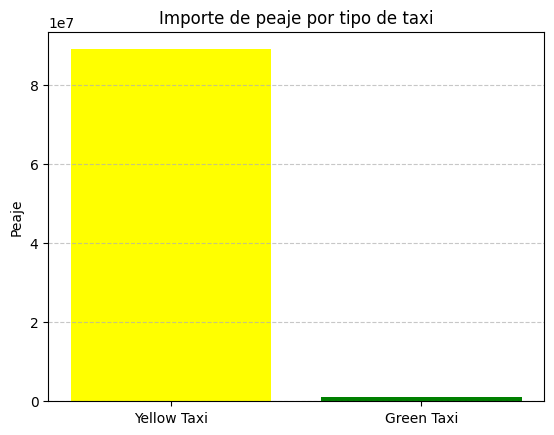

In [34]:
PeajeYellow = yellow.select(pl.col("total_amount").sum())[0, 0]
PeajeGreen = green.select(pl.col("total_amount").sum())[0, 0]

print("Peaje Yellow:", PeajeYellow)
print("Peaje Green:", PeajeGreen)

tipos_taxi = ['Yellow Taxi', 'Green Taxi']
total_peaje = [PeajeYellow, PeajeGreen]

plt.bar(tipos_taxi, total_peaje, color=['yellow', 'green'])
plt.ylabel('Peaje')
plt.title('Importe de peaje por tipo de taxi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()